# Загрузка датасета

В данном отчете проводится исследовательский анализ данных (EDA) датасета, содержащего физико-химические свойства химических соединений. 
Цель анализа - оценить качество данных, выявить закономерности и подготовить данные для дальнейшего анализа.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('data/properties.csv')
data.head(10)

,index,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,...,0.000,0,H3N,0,0,0,1,17.030525,0.000000,0
1,1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,...,1.422,60,C9H8O4,0,0,0,13,180.157769,0.047619,3
2,2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,...,0.418,2,C2H2,0,0,0,2,26.037353,0.000000,0
3,3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476,0.106383,8
4,4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406463,0.162791,4
5,5,Row5,O=C1O[C@H]([C@@H](O)CO)C(=C1O)O,C6H8O6,1.46,20.706344,0,0,20,11.619656,...,-0.178,58,C6H8O6,0,0,0,12,176.124371,0.150000,2
6,6,Row6,O=C1OC([C@@H](O)CO)C(=C1O)O,C6H8O6,1.46,20.706344,0,0,20,11.619656,...,-0.178,58,C6H8O6,0,0,0,12,176.124371,0.150000,2
7,7,Row7,NC(Cc1ccccc1)C,C9H13N,2.34,25.608309,6,6,23,13.551691,...,1.762,44,C9H13N,0,0,0,10,135.206556,0.130435,2
8,8,Row8,O=C(OC)[C@@H](NC(=O)[C@@H](N)CC(=O)O)Cc1ccccc1,C14H18N2O5,2.23,42.852274,6,6,39,24.467726,...,-0.077,96,C14H18N2O5,0,0,0,21,294.303667,0.128205,8
9,9,Row9,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O5S,2.23,51.039067,6,6,44,27.904933,...,-2.138,138,C16H19N3O5S,0,0,0,25,365.405868,0.159091,4


Описание каждой фичи можно прочитать в README

# Описание датасета

In [15]:
print("Размер датасета:", data.shape)
print("Типы данных:\n", data.dtypes.value_counts())

Размер датасета: (15166, 34)
Типы данных:
 int64      17
object     10
float64     7
Name: count, dtype: int64


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   15166 non-null  int64  
 1   row ID                                  15166 non-null  object 
 2   Molecule                                15166 non-null  object 
 3   Molecule name                           15166 non-null  object 
 4   Mannhold LogP                           15166 non-null  float64
 5   Atomic Polarizabilities                 15166 non-null  object 
 6   Aromatic Atoms Count                    15166 non-null  int64  
 7   Aromatic Bonds Count                    15166 non-null  int64  
 8   Element Count                           15166 non-null  int64  
 9   Bond Polarizabilities                   15166 non-null  object 
 10  Bond Count                              15166 non-null  in

In [17]:
data.describe()

,index,Mannhold LogP,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Count,Eccentric Connectivity Index,Fragment Complexity,Hydrogen Bond Acceptors,Hydrogen Bond Donors,...,Lipinski's Rule of Five,Vertex adjacency information magnitude,XLogP,Zagreb Index,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,SP3 Character,Rotatable Bonds Count (non terminal)
count,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,1.516600e+04,1.516600e+04,15166.000000,15166.000000,...,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000
mean,7582.500000,2.489623,6.645325,6.843532,41.623104,22.741329,1.089732e+04,2.798695e+03,3.985955,1.844323,...,0.476395,4.986438,2.399497,110.115785,-0.002308,0.250495,-0.252802,21.660359,0.147718,4.736582
std,4378.191426,1.187376,8.185700,8.547718,41.772484,23.592569,3.398257e+08,1.844452e+04,6.928470,3.744471,...,0.949536,1.416277,3.538269,116.877808,0.303287,0.883574,0.905883,21.711399,0.100503,8.338553
min,0.000000,-4.810000,0.000000,0.000000,1.000000,0.000000,-2.129542e+09,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,-34.188000,0.000000,-16.000000,0.000000,-19.000000,0.000000,0.000000,0.000000
25%,3791.250000,1.680000,0.000000,0.000000,21.000000,11.000000,9.400000e+01,3.020400e+02,1.000000,0.000000,...,0.000000,4.459432,0.550250,48.000000,0.000000,0.000000,0.000000,11.000000,0.066667,1.000000
50%,7582.500000,2.450000,6.000000,6.000000,36.000000,21.000000,3.110000e+02,1.024050e+03,3.000000,1.000000,...,0.000000,5.392317,2.286000,98.000000,0.000000,0.000000,0.000000,20.000000,0.153846,3.000000
75%,11373.750000,3.220000,12.000000,12.000000,53.000000,29.000000,6.270000e+02,2.324015e+03,5.000000,2.000000,...,1.000000,5.857981,3.952000,144.000000,0.000000,0.000000,0.000000,27.000000,0.222222,6.000000
max,15165.000000,47.440000,228.000000,244.000000,1262.000000,769.000000,2.100654e+09,1.310691e+06,229.000000,90.000000,...,5.000000,10.586840,137.302000,3890.000000,8.000000,19.000000,0.000000,693.000000,1.000000,203.000000


In [18]:
initial_size = data.shape[0]
data.drop_duplicates(inplace=True)
final_size = data.shape[0]

if initial_size == final_size:
	print('Дубликатов нет')
else:
	print(f'Удалено дубликатов: {initial_size - final_size}')

Дубликатов нет


# Преобразование датасета

Датасет имеет несколько бессмысленных колонок, которые дублируют уже существующую. Просто удалим их

In [19]:
data.drop(['row ID', 'Molecule', 'Molecular Formula'], axis=1)

,index,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,...,Molecular Weight,XLogP,Zagreb Index,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,0,H3N,1.35,3.100379,0,0,4,1.299621,0,0.0,...,17.026549,0.000,0,0,0,0,1,17.030525,0.000000,0
1,1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,123.0,...,180.042259,1.422,60,0,0,0,13,180.157769,0.047619,3
2,2,C2H2,1.68,4.853586,0,0,4,2.186414,1,2.0,...,26.01565,0.418,2,0,0,0,2,26.037353,0.000000,0
3,3,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,768.0,...,506.995745,-5.533,170,0,0,0,31,507.181476,0.106383,8
4,4,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,481.0,...,349.109627,-1.732,132,0,0,0,24,349.406463,0.162791,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,15161,C22H28O4,3.44,60.598204,0,0,54,35.399796,29,510.0,...,356.198759,3.245,150,0,0,0,26,356.456151,0.277778,3
15162,15162,C21H18O5S,3.11,55.872274,18,18,45,28.069726,30,439.0,...,382.087495,3.876,154,0,0,0,27,382.431497,0.066667,2
15163,15163,C7H15NO5S,1.46,30.331895,0,0,29,26.770105,14,176.0,...,225.067094,-2.121,66,0,0,0,14,225.264075,0.241379,4
15164,15164,H4As,1.35,6.977172,0,0,5,14.572828,0,0.0,...,78.952897,0.000,0,1,1,0,1,78.95336,0.000000,0


На первый взгляд кажется, что в датасете нет пропусков. Однако тип некоторых признаков указан как object, в то время когда они должны быть int или float. Надо с этим разобраться 

In [20]:
def find_non_numeric_values(data, column_name):
    """Находит все нечисловые значения в указанной колонке"""
    if column_name not in data.columns:
        return []
    
    numeric_series = pd.to_numeric(data[column_name], errors='coerce')
    
    non_numeric_mask = numeric_series.isna() & data[column_name].notna()
    
    return data[column_name][non_numeric_mask].unique()

for col in ['Atomic Polarizabilities', 'Bond Polarizabilities', 'VABC Volume Descriptor', 'Topological Polar Surface Area', 'Molecular Weight', 'Molar Mass']:
    if col in data.columns:
        non_numeric_vals = find_non_numeric_values(data, col)
        if len(non_numeric_vals) > 0:
            print(f"\n{col} - нечисловые значения: {list(non_numeric_vals)}")


Atomic Polarizabilities - нечисловые значения: ['#NUM!']

Bond Polarizabilities - нечисловые значения: ['#NUM!']

VABC Volume Descriptor - нечисловые значения: ['#NUM!']

Topological Polar Surface Area - нечисловые значения: ['#NUM!']

Molecular Weight - нечисловые значения: ['#NUM!']

Molar Mass - нечисловые значения: ['#NUM!']


Теперь посмотрим на количество нечисловых значений в каждой колонке

In [21]:
for col in ['Atomic Polarizabilities', 'Bond Polarizabilities', 'VABC Volume Descriptor', 'Topological Polar Surface Area', 'Molecular Weight', 'Molar Mass']:
    if col in data.columns:
        num_count = (data[col] == '#NUM!').sum()
        total_count = len(data[col])
        percentage = (num_count / total_count) * 100
        print(f"{col}: {num_count} (#NUM!) из {total_count} ({percentage:.1f}%)")

Atomic Polarizabilities: 3 (#NUM!) из 15166 (0.0%)
Bond Polarizabilities: 3 (#NUM!) из 15166 (0.0%)
VABC Volume Descriptor: 1559 (#NUM!) из 15166 (10.3%)
Topological Polar Surface Area: 7 (#NUM!) из 15166 (0.0%)
Molecular Weight: 3 (#NUM!) из 15166 (0.0%)
Molar Mass: 31 (#NUM!) из 15166 (0.2%)


Видим, что почти во всех колонках количество #NUM! очень мало, однако в колонке VABC Volume Descriptor количество "пропусков" немалое

Заполнять ячейки с #NUM! медианным значением некорректно, поскольку каждое свойство уникально для каждого соединения. Поэтому сделаем замену на Nan

In [22]:
for col in ['Atomic Polarizabilities', 'Bond Polarizabilities', 'VABC Volume Descriptor', 
           'Topological Polar Surface Area', 'Molecular Weight', 'Molar Mass']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

Сделаем проверку целостности данных

In [23]:
non_numeric_problems = {}
for col in ['Atomic Polarizabilities', 'Bond Polarizabilities', 'VABC Volume Descriptor', 'Topological Polar Surface Area', 'Molecular Weight', 'Molar Mass']:
    if col in data.columns:
        non_numeric_vals = find_non_numeric_values(data, col)
        if len(non_numeric_vals) > 0:
            non_numeric_problems[col] = {
                'values': list(non_numeric_vals),
                'count': (data[col].isin(non_numeric_vals)).sum()
            }

if non_numeric_problems:
    print("Обнаружены нечисловые значения:")
    for col, info in non_numeric_problems.items():
        print(f"  {col}: {info['count']} значений '{info['values'][0]}'")
else:
    print("Нечисловых значений не обнаружено")

total_cells = data.shape[0] * data.shape[1]
missing_cells = data.isnull().sum().sum()
non_numeric_cells = sum(info['count'] for info in non_numeric_problems.values())

integrity_score = ((total_cells - missing_cells - non_numeric_cells) / total_cells) * 100

print()
print(f"Всего ячеек: {total_cells}")
print(f"Пропущенных значений: {missing_cells} ({missing_cells/total_cells*100:.1f}%)")
print(f"Нечисловых значений: {non_numeric_cells} ({non_numeric_cells/total_cells*100:.1f}%)")
print(f"Оценка целостности данных: {integrity_score:.1f}%")

Нечисловых значений не обнаружено

Всего ячеек: 515644
Пропущенных значений: 1606 (0.3%)
Нечисловых значений: 0 (0.0%)
Оценка целостности данных: 99.7%


Возьмем ключевые признаки-свойства соединений и посмотрим на их распределение

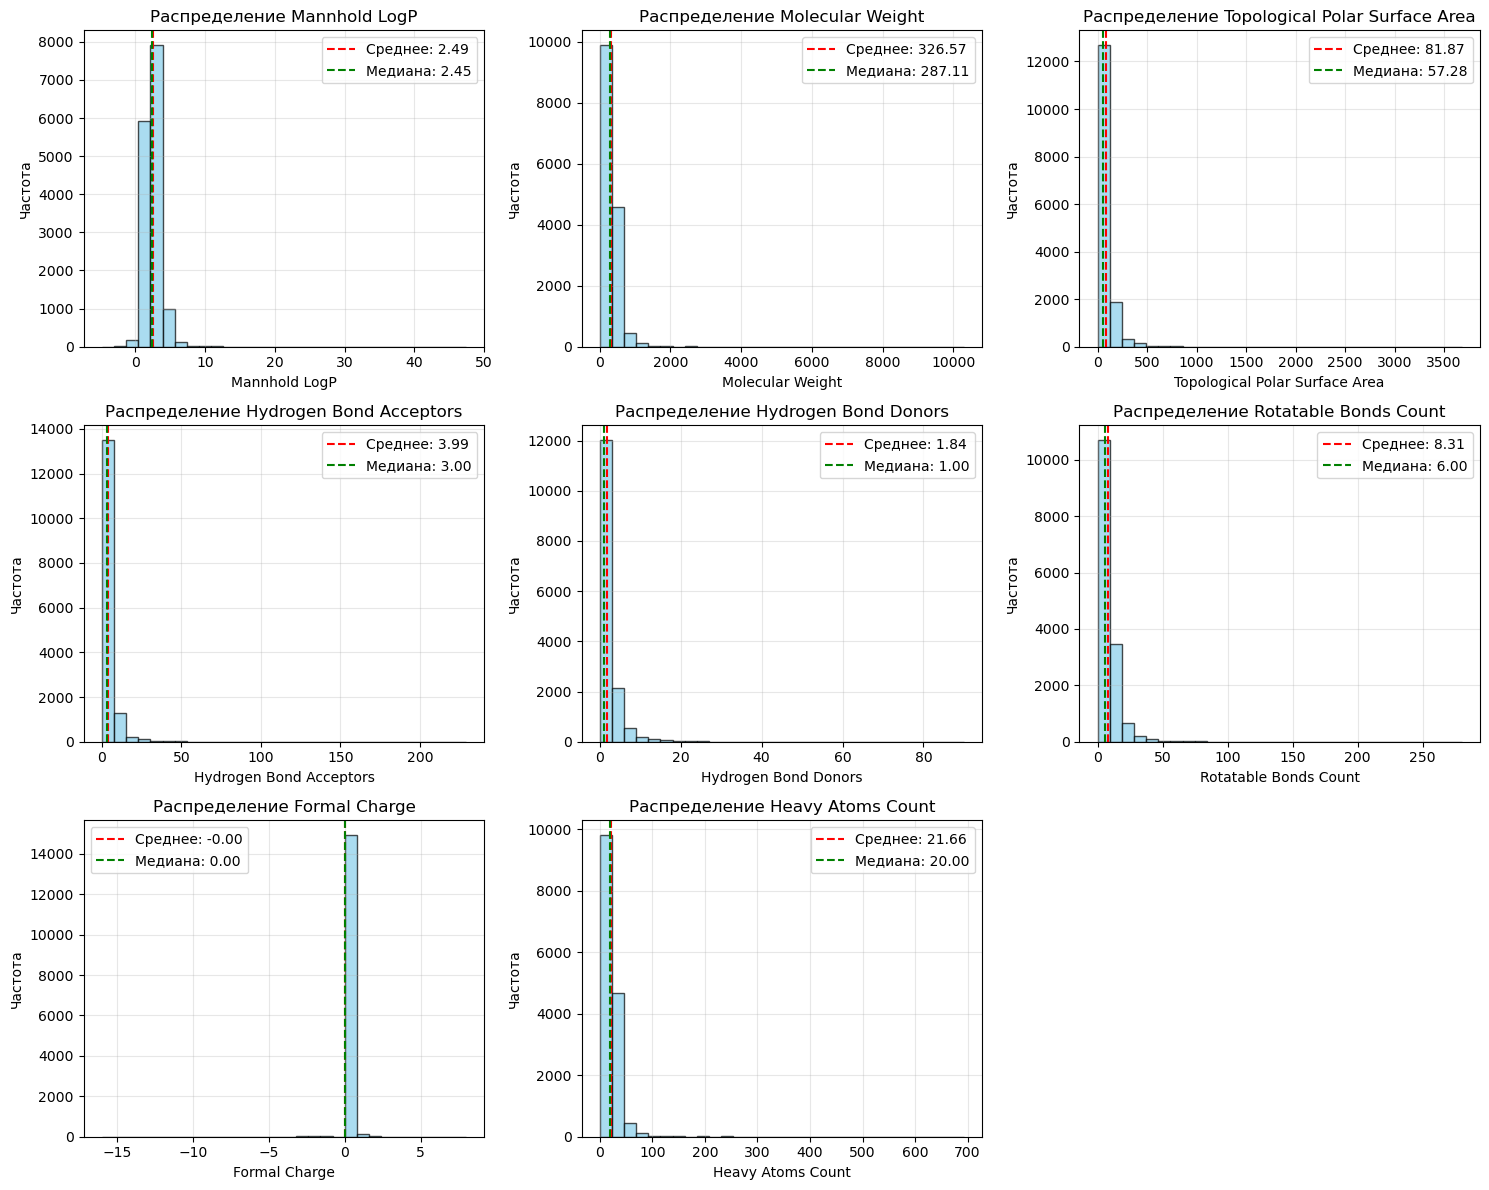

In [24]:
key_metrics = ['Mannhold LogP', 'Molecular Weight', 'Topological Polar Surface Area', 
              'Hydrogen Bond Acceptors', 'Hydrogen Bond Donors', 'Rotatable Bonds Count',
              'Formal Charge', 'Heavy Atoms Count']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(key_metrics):
    if col in data.columns:
        plot_data = data[col].dropna()
        
        axes[i].hist(plot_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')
        axes[i].grid(True, alpha=0.3)
        
        mean_val = plot_data.mean()
        median_val = plot_data.median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Медиана: {median_val:.2f}')
        axes[i].legend()

axes[8].set_visible(False)

plt.tight_layout()
plt.show()

Выводы по распределениям ключевых признаков:
- Mannhold LogP: нормальное распределение, типично для химических соединений
- Molecular Weight: широкий диапазон значений, правостороннее распределение
- Topological Polar Surface Area: несколько пиков, возможно разные классы соединений
- Hydrogen Bond Acceptors/Donors: дискретные распределения
- Formal Charge: большинство соединений нейтральны

# Оценка аномалий/выбросов

ПРОЦЕНТ ВЫБРОСОВ ПО КОЛОНКАМ
Mannhold LogP                 :   1.3% (194 из 15166)
Molecular Weight              :   4.2% (639 из 15163)
Topological Polar Surface Area:   6.2% (946 из 15159)
Hydrogen Bond Acceptors       :   4.8% (727 из 15166)
Hydrogen Bond Donors          :   6.6% (999 из 15166)
Rotatable Bonds Count         :   5.3% (800 из 15166)
Formal Charge                 :   1.7% (252 из 15166)
Heavy Atoms Count             :   3.6% (545 из 15166)

Средний процент выбросов: 4.2%
Медианный процент выбросов: 4.5%


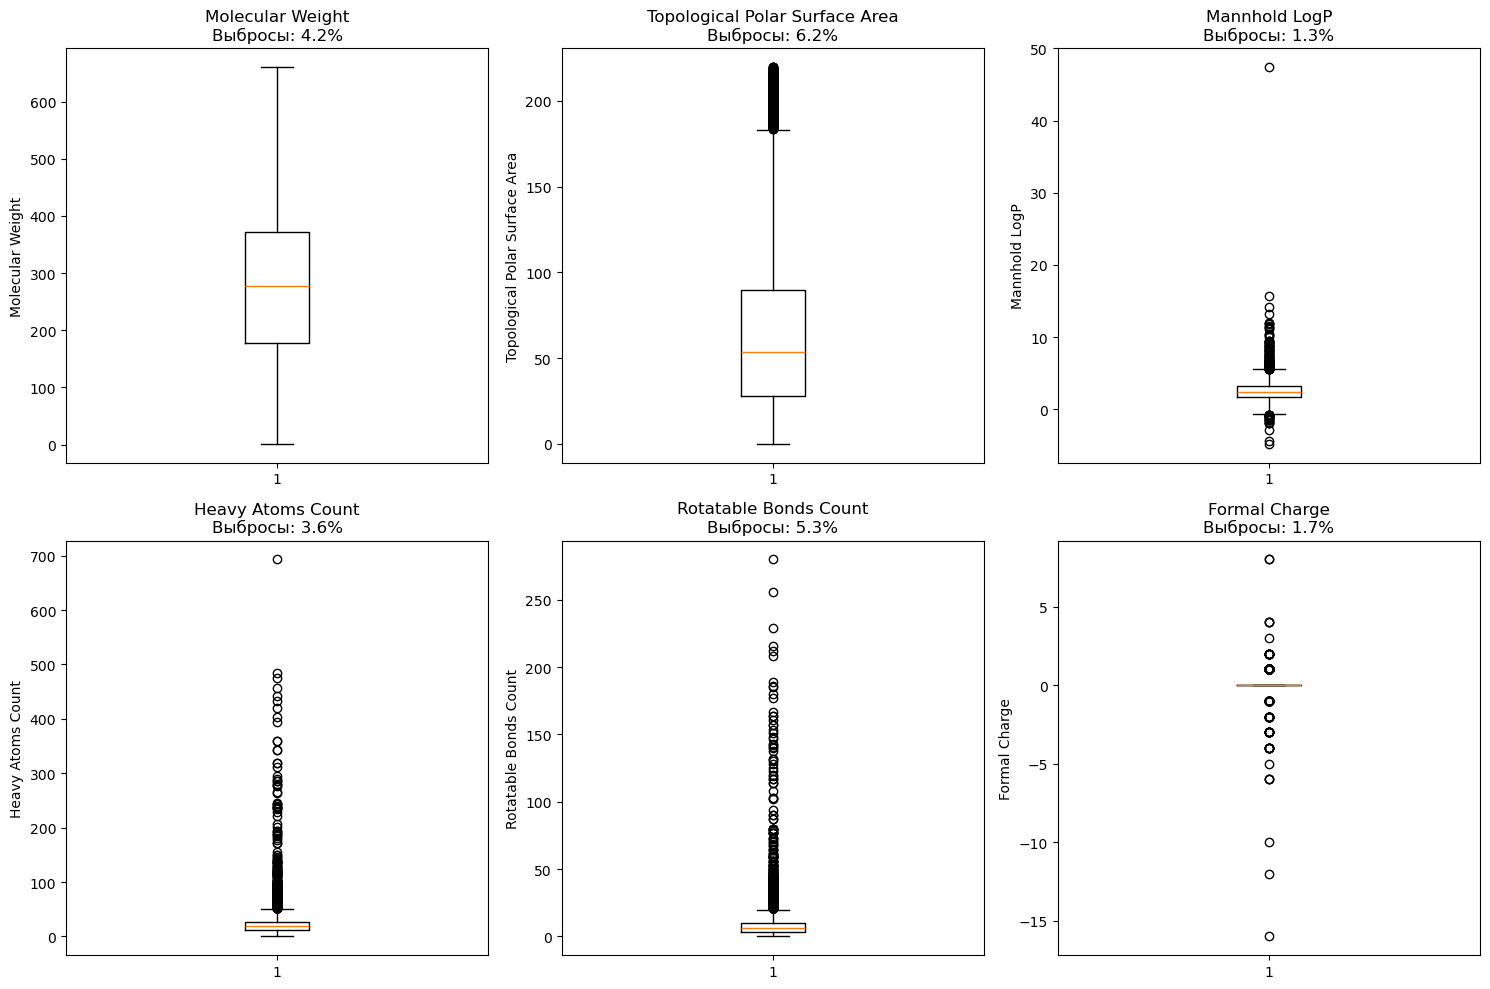

In [25]:
def detect_outliers_iqr(series):
    """Обнаружение выбросов методом IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_report = {}

for col in key_metrics:
    if col in data.columns:
        series = data[col].dropna()
        outliers, lower, upper = detect_outliers_iqr(series)
        
        outliers_report[col] = {
            'outliers_count': len(outliers),
            'outliers_percent': (len(outliers) / len(series)) * 100,
            'lower_bound': lower,
            'upper_bound': upper,
            'min_value': series.min(),
            'max_value': series.max(),
            'total_observations': len(series)
        }

outliers_df = pd.DataFrame(outliers_report).T
outliers_df = outliers_df.sort_values('outliers_percent', ascending=False)

print("ПРОЦЕНТ ВЫБРОСОВ ПО КОЛОНКАМ")
for col, report in outliers_report.items():
    print(f"{col:<30}: {report['outliers_percent']:5.1f}% ({report['outliers_count']:3d} из {report['total_observations']:3d})")

print(f"\nСредний процент выбросов: {outliers_df['outliers_percent'].mean():.1f}%")
print(f"Медианный процент выбросов: {outliers_df['outliers_percent'].median():.1f}%")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

key_outlier_cols = ['Molecular Weight', 'Topological Polar Surface Area', 'Mannhold LogP', 
                   'Heavy Atoms Count', 'Rotatable Bonds Count', 'Formal Charge']

for i, col in enumerate(key_outlier_cols):
    if col in data.columns:
        data_boxplot = data[col].dropna()
        
        if col in ['Molecular Weight', 'Topological Polar Surface Area']:
            q95 = data_boxplot.quantile(0.95)
            data_boxplot = data_boxplot[data_boxplot <= q95]
        
        axes[i].boxplot(data_boxplot)
        
        outlier_percent = outliers_report[col]['outliers_percent']
        axes[i].set_title(f'{col}\nВыбросы: {outlier_percent:.1f}%')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

После проведения оценки выбросов, можно сказать, что ключевые колонки имеют малое число выбросов (менее 7%)

# Анализ корреляци

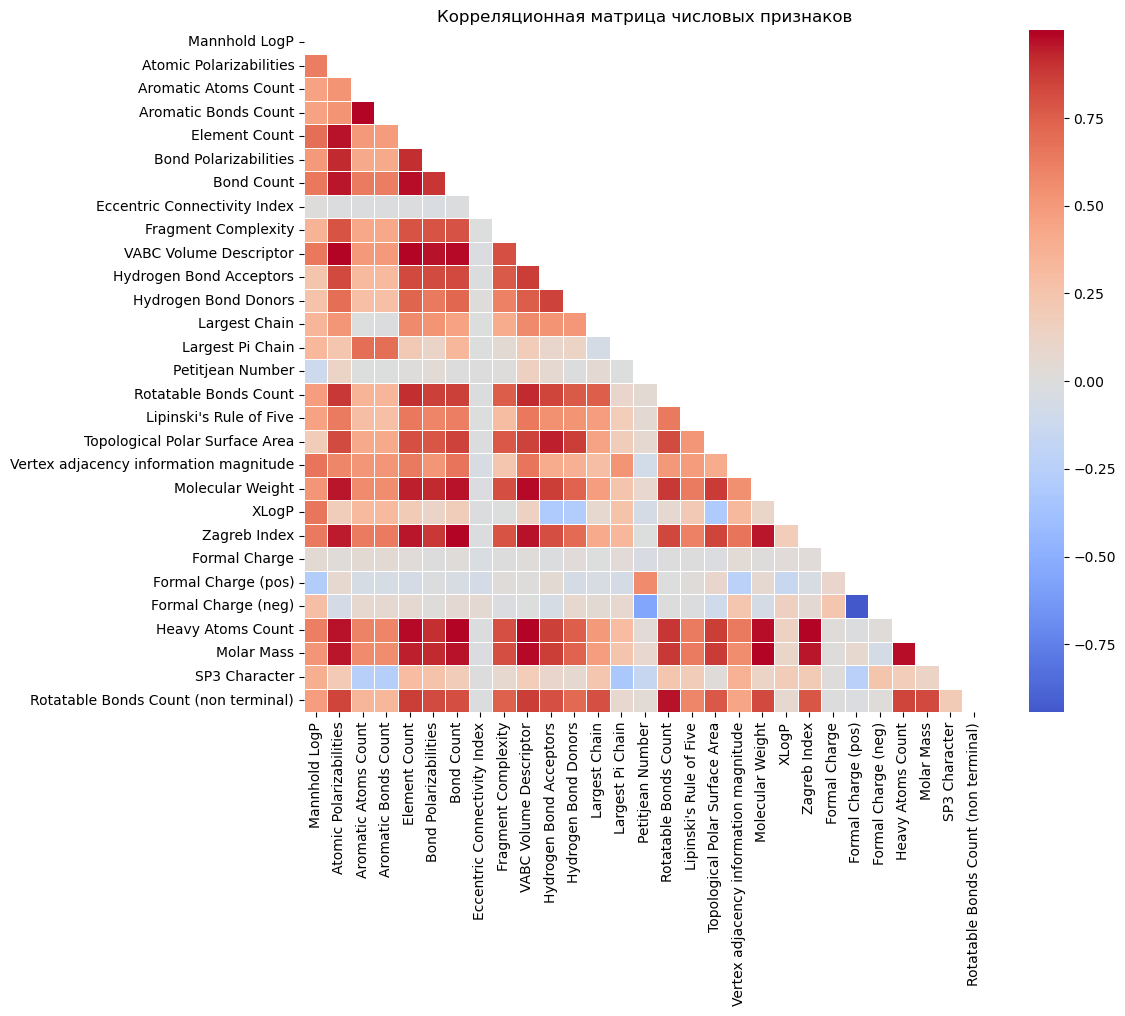

In [26]:
numeric_df = data.select_dtypes(include=[np.number])

correlation_columns = ['Mannhold LogP',
       'Atomic Polarizabilities', 'Aromatic Atoms Count',
       'Aromatic Bonds Count', 'Element Count', 'Bond Polarizabilities',
       'Bond Count', 'Eccentric Connectivity Index', 'Fragment Complexity',
       'VABC Volume Descriptor', 'Hydrogen Bond Acceptors',
       'Hydrogen Bond Donors', 'Largest Chain', 'Largest Pi Chain',
       'Petitjean Number', 'Rotatable Bonds Count', "Lipinski's Rule of Five",
       'Topological Polar Surface Area',
       'Vertex adjacency information magnitude', 'Molecular Weight', 'XLogP',
       'Zagreb Index', 'Formal Charge',
       'Formal Charge (pos)', 'Formal Charge (neg)', 'Heavy Atoms Count',
       'Molar Mass', 'SP3 Character', 'Rotatable Bonds Count (non terminal)']

correlation_columns = [col for col in correlation_columns if col in numeric_df.columns]

plt.figure(figsize=(12, 10))
corr_matrix = numeric_df[correlation_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

Исходя из матрицы корреляции, можно сделать вывод, что много признаков имеют корреляцию между собой. В дальнейшем можно провести семантический анализ для удаления высококоррелированных признаков

In [27]:
# 1. COMPLETENESS - Полнота данных
print("COMPLETENESS (≥0.98):")
completeness = data.notna().mean()
print(f"Общая полнота: {completeness.mean():.4f}")
print(f"Проблемные колонки (<0.98):")
print(completeness[completeness < 0.98])

# 2. UNIQUENESS - Уникальность записей  
print("\nUNIQUENESS (=1.0):")
identifiers = ['index', 'row ID']
for col in identifiers:
    if col in data.columns:
        unique_ratio = data[col].nunique() / len(data)
        status = "PASS" if unique_ratio == 1.0 else "FAIL"
        print(f"{col}: {unique_ratio:.4f} ({status})")

COMPLETENESS (≥0.98):
Общая полнота: 0.9969
Проблемные колонки (<0.98):
VABC Volume Descriptor    0.897204
dtype: float64

UNIQUENESS (=1.0):
index: 1.0000 (PASS)
row ID: 1.0000 (PASS)


# Расширенная визуализация

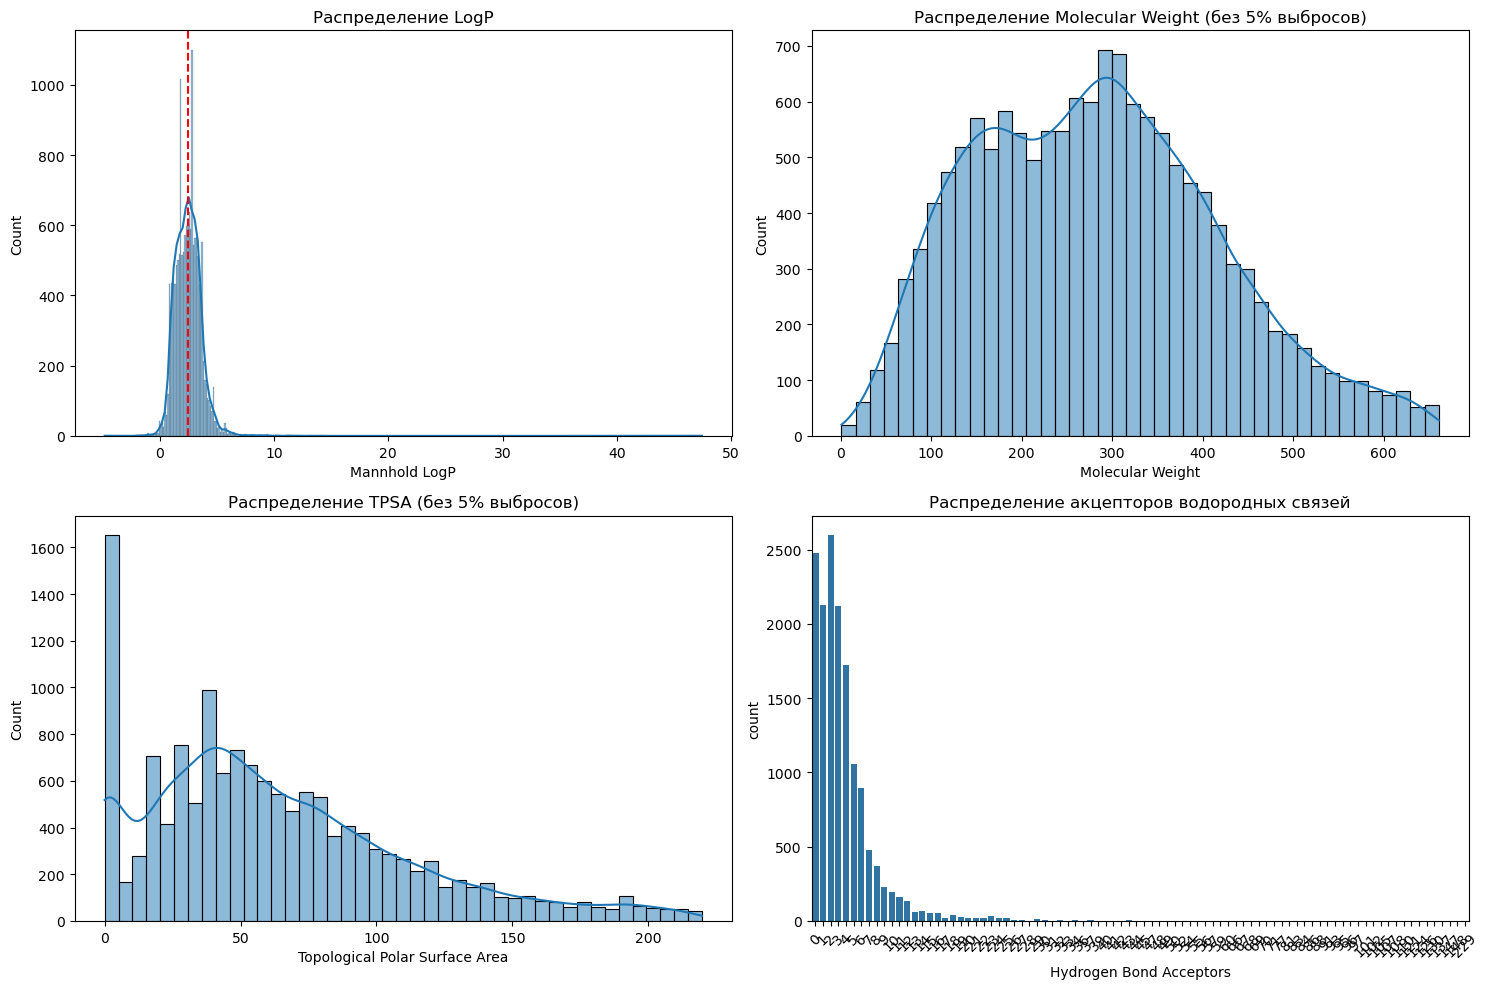

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=data, x='Mannhold LogP', kde=True, ax=axes[0,0])
axes[0,0].set_title('Распределение LogP')
axes[0,0].axvline(data['Mannhold LogP'].mean(), color='red', linestyle='--', label='Среднее')

mw_clean = data[data['Molecular Weight'] <= data['Molecular Weight'].quantile(0.95)]
sns.histplot(data=mw_clean, x='Molecular Weight', kde=True, ax=axes[0,1])
axes[0,1].set_title('Распределение Molecular Weight (без 5% выбросов)')

tpsa_clean = data[data['Topological Polar Surface Area'] <= data['Topological Polar Surface Area'].quantile(0.95)]
sns.histplot(data=tpsa_clean, x='Topological Polar Surface Area', kde=True, ax=axes[1,0])
axes[1,0].set_title('Распределение TPSA (без 5% выбросов)')

sns.countplot(data=data, x='Hydrogen Bond Acceptors', ax=axes[1,1])
axes[1,1].set_title('Распределение акцепторов водородных связей')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

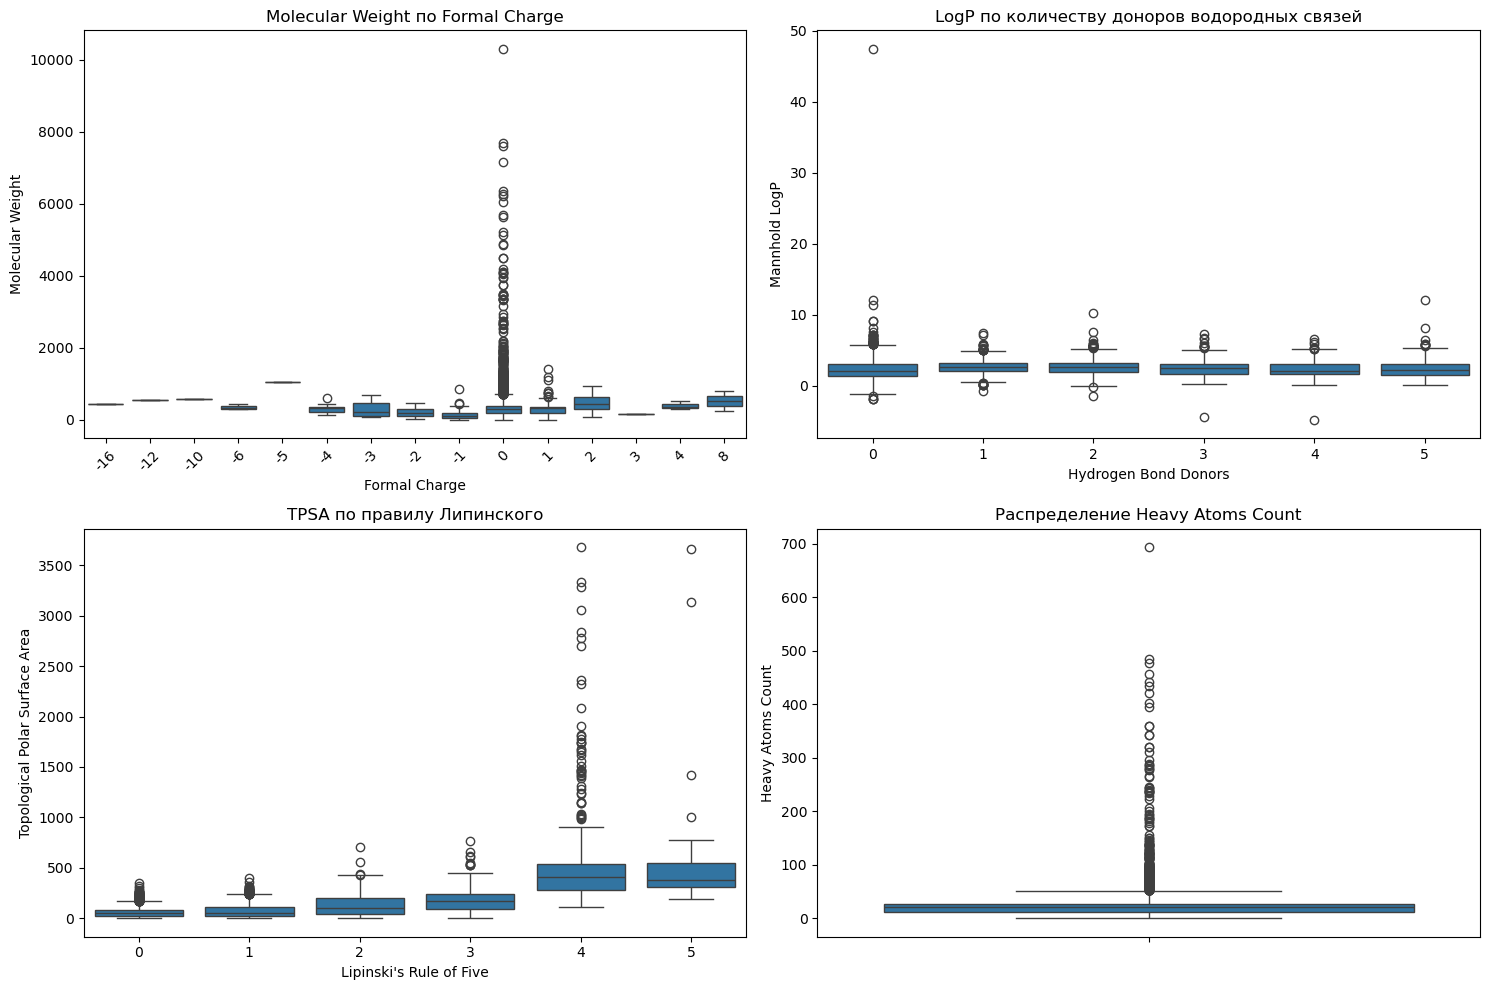

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

if 'Formal Charge' in data.columns:
    sns.boxplot(data=data, x='Formal Charge', y='Molecular Weight', ax=axes[0,0])
    axes[0,0].set_title('Molecular Weight по Formal Charge')
    axes[0,0].tick_params(axis='x', rotation=45)

if 'Hydrogen Bond Donors' in data.columns:
    hbd_clean = data[data['Hydrogen Bond Donors'] <= 5]
    sns.boxplot(data=hbd_clean, x='Hydrogen Bond Donors', y='Mannhold LogP', ax=axes[0,1])
    axes[0,1].set_title('LogP по количеству доноров водородных связей')

if "Lipinski's Rule of Five" in data.columns:
    sns.boxplot(data=data, x="Lipinski's Rule of Five", y='Topological Polar Surface Area', ax=axes[1,0])
    axes[1,0].set_title('TPSA по правилу Липинского')

if 'Heavy Atoms Count' in data.columns:
    sns.boxplot(data=data, y='Heavy Atoms Count', ax=axes[1,1])
    axes[1,1].set_title('Распределение Heavy Atoms Count')

plt.tight_layout()
plt.show()

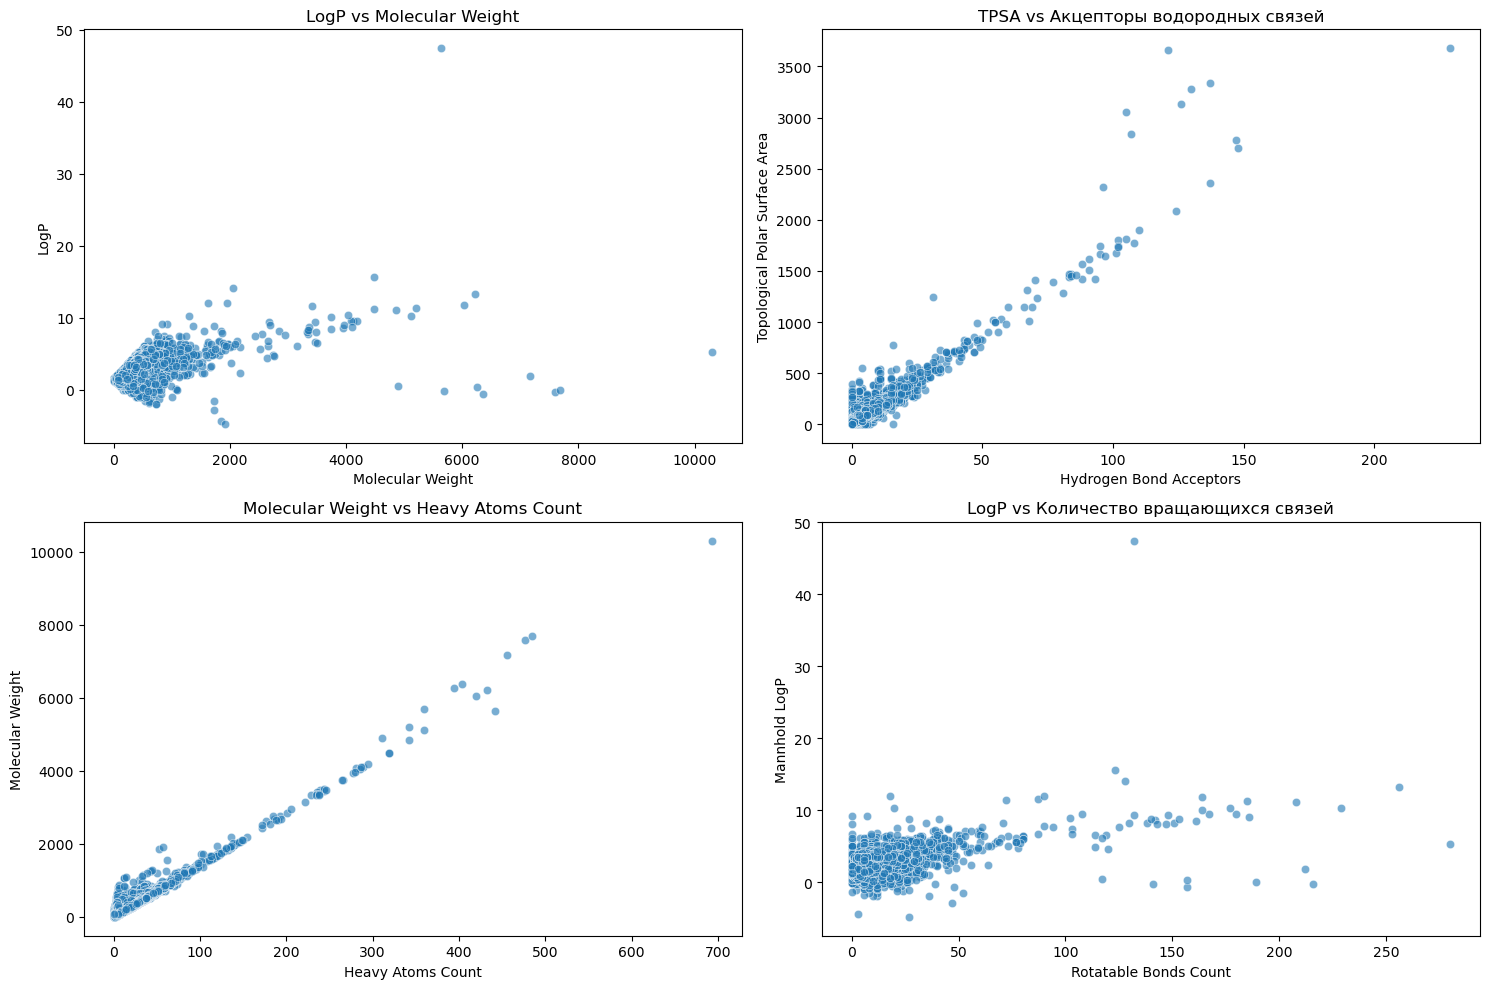

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(data=data, x='Molecular Weight', y='Mannhold LogP', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('LogP vs Molecular Weight')
axes[0,0].set_xlabel('Molecular Weight')
axes[0,0].set_ylabel('LogP')

sns.scatterplot(data=data, x='Hydrogen Bond Acceptors', y='Topological Polar Surface Area', 
                alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('TPSA vs Акцепторы водородных связей')

sns.scatterplot(data=data, x='Heavy Atoms Count', y='Molecular Weight', 
                alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Molecular Weight vs Heavy Atoms Count')

sns.scatterplot(data=data, x='Rotatable Bonds Count', y='Mannhold LogP', 
                alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('LogP vs Количество вращающихся связей')

plt.tight_layout()
plt.show()

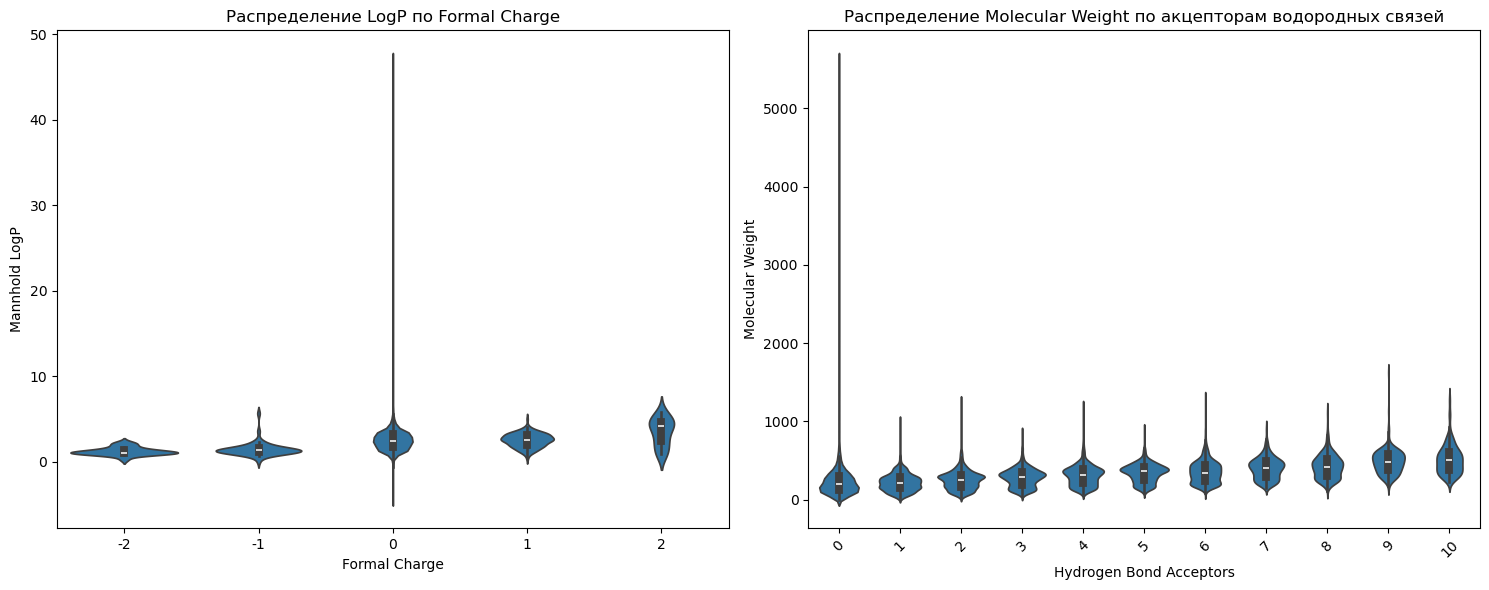

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

if 'Formal Charge' in data.columns:
    fc_clean = data[data['Formal Charge'].between(-2, 2)]
    sns.violinplot(data=fc_clean, x='Formal Charge', y='Mannhold LogP', ax=axes[0])
    axes[0].set_title('Распределение LogP по Formal Charge')

if 'Hydrogen Bond Acceptors' in data.columns:
    hba_clean = data[data['Hydrogen Bond Acceptors'] <= 10]
    sns.violinplot(data=hba_clean, x='Hydrogen Bond Acceptors', y='Molecular Weight', ax=axes[1])
    axes[1].set_title('Распределение Molecular Weight по акцепторам водородных связей')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()